<a href="https://colab.research.google.com/github/Erickrus/llm/blob/main/llama_3_2_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Nov  9 14:40:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   43C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [33]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [ ]:
!ollama pull llama3.2-vision:11b

In [26]:
!ollama list

NAME                   ID              SIZE      MODIFIED       
llama3.2-vision:11b    38107a0cd119    7.9 GB    18 minutes ago    


In [36]:
#@title download the image
!curl -o "image.webp" "https://img-cdn.pixlr.com/image-generator/history/65bb506dcb310754719cf81f/ede935de-1138-4f66-8ed7-44bd16efc709/medium.webp"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49764  100 49764    0     0   620k      0 --:--:-- --:--:-- --:--:--  623k


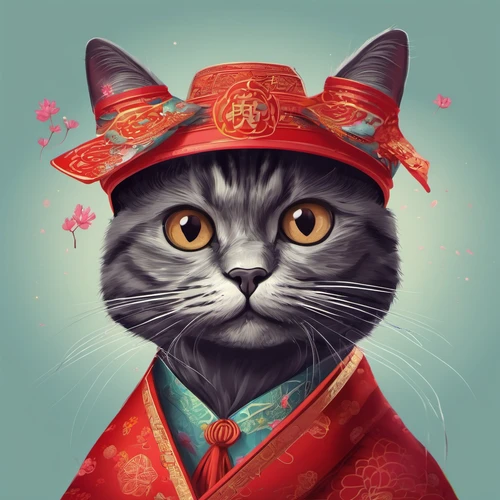

In [39]:
#@title convert the image to png format
from PIL import Image # Open a WebP image
webp_image = Image.open("image.webp")
webp_image.save("image.png")

webp_image

In [38]:
#@title explain the image
import base64
import json
import requests

def query_image(
    prompt,
    image_filename,
    url='localhost:11434',
    model_name= "llama3.2-vision:11b",
):
    api_url = f"http://{url}/api/generate"
    image_base64 = base64.b64encode(open(image_filename, "rb").read()).decode('utf-8')

    data = {
      "model": model_name,
      "prompt": prompt,
      "stream": False,
      "images": [image_base64]
    }

    data_json = json.dumps(data)
    try:
        response = requests.post(api_url, json=data)
        response.raise_for_status()
        print(response.json()['response'])
    except requests.exceptions.RequestException as e:
        print("Request failed:", e)

query_image("What is in this picture?", "/content/image.png")


The image depicts a cat dressed as if it were a person. The cat appears to be wearing a red Chinese robe and matching head covering, which includes an elaborate bow at the front. It has a serious expression on its face. The image seems to be a digitally created artwork intended to showcase this imaginative scene.
